<a href="https://colab.research.google.com/github/Sneakypeat/Sneakypeat/blob/main/heart_disease_preditiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
# Display the DataFrame
print(df.head())
# Get some basic statistics on the DataFrame
print("Statistics:")
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   9

In [ ]:
# Calculate the correlation between columns
print("Correlation:")
corr_matrix = df.corr()
for column in df.columns:
    if column != "index":
        print("Correlation between target and", column)
        print(corr_matrix["target"][column])


Correlation:
Correlation between target and age
-0.22543871587483838
Correlation between target and sex
-0.28093657550176676
Correlation between target and cp
0.43379826150689443
Correlation between target and trestbps
-0.14493112849775
Correlation between target and chol
-0.08523910513756904
Correlation between target and fbs
-0.028045760272712952
Correlation between target and restecg
0.1372295028737732
Correlation between target and thalach
0.4217409338106742
Correlation between target and exang
-0.43675708335330315
Correlation between target and oldpeak
-0.4306960016873686
Correlation between target and slope
0.34587707824172464
Correlation between target and ca
-0.39172399235125244
Correlation between target and thal
-0.34402926803830997
Correlation between target and target
1.0


<Axes: >

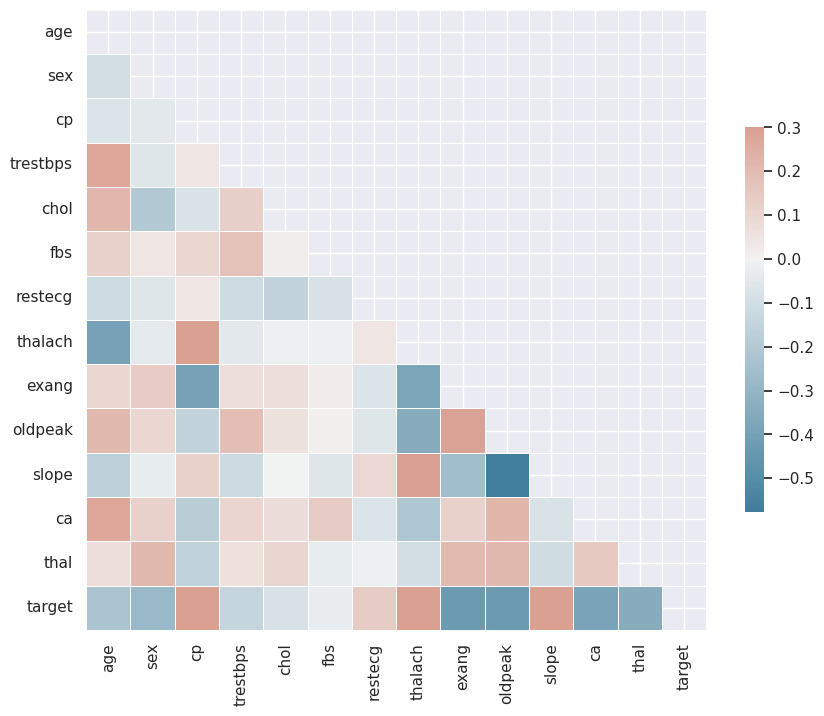

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
corr = df[features].corr()
# Correlation Matrix
sns.set_theme(style="darkgrid")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Gender Count:
1    207
0     96
Name: sex, dtype: int64


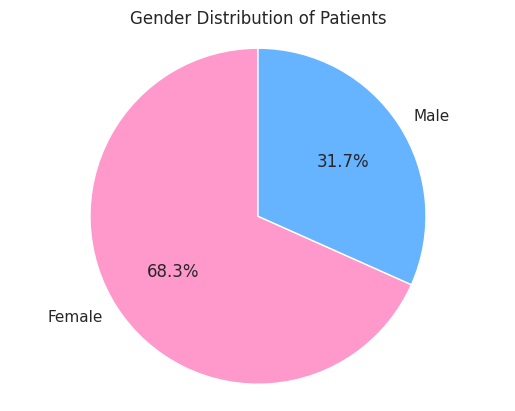

In [ ]:
# Count the number of male and female patients
gender_count = df['sex'].value_counts()
print("Gender Count:")
print(gender_count)

# Plot gender distribution of patients
labels = ['Female', 'Male']
colors = ['#ff99cc', '#66b3ff']
plt.pie(gender_count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Patients')
plt.axis('equal')
plt.show()

<ipython-input-14-545934215f14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="cp", palette=["g", "b", 'orange', "purple"])


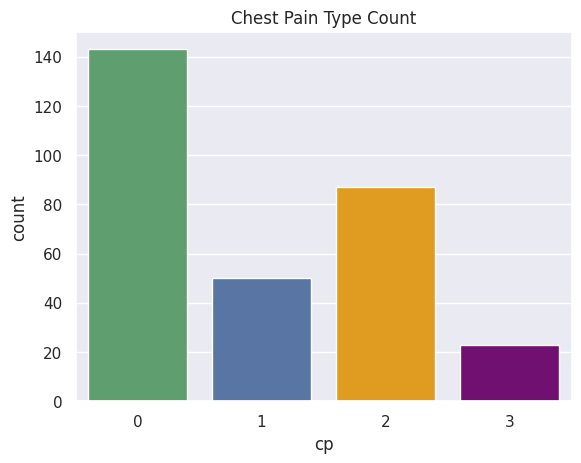

In [ ]:
# Plot Chest Pain Type Count
plt.title('Chest Pain Type Count')
sns.countplot(data=df, x="cp", palette=["g", "b", 'orange', "purple"])
plt.show()


Target Count:
1    165
0    138
Name: target, dtype: int64


<ipython-input-15-61150d73888e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="target", palette=["g", "b"])


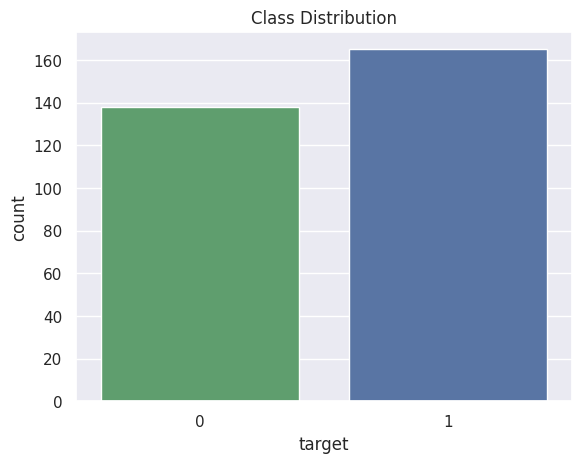

In [ ]:
# Count the number of patients with different target values
target_count = df['target'].value_counts()
print("Target Count:")
print(target_count)

# Class Distribution
sns.countplot(data=df, x="target", palette=["g", "b"])
plt.title("Class Distribution")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


In [ ]:
# Prepare the data for modeling
X = df.drop('target', axis=1)
y = df['target']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the preprocessor pipeline for scaling numerical features
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), X_train.select_dtypes(include=['float64', 'int64']).columns)])
# Define the pipeline with logistic regression classifier
lr = LogisticRegression(max_iter=10)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', lr)])
# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict_proba(X_test)[:, 1]
# Compute evaluation metrics
auc_score = roc_auc_score(y_test, predictions)*100
print(f"Area under ROC: {auc_score}")


Area under ROC: 88.2439024390244


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_selector as selector

In [ ]:
# Prepare the data for modeling
X = df.drop("target", axis=1)
y = df["target"]

# Define the classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10),
    "Random Forest": RandomForestClassifier(n_estimators=10),
    "Linear SVM": LinearSVC(max_iter=10)
}
# Define the metrics to evaluate
metrics = {
    "AUC": roc_auc_score,
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1-score": f1_score
}
# Initialize a dictionary to store the results
results = {}
# Run 5-fold cross-validation for each classifier
for clf_name, clf in classifiers.items():
    print(f"\nClassifier: {clf_name}")
    results[clf_name] = {}
    for metric_name, metric in metrics.items():
        results[clf_name][metric_name] = []
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X, y):
        print("Fold")
        # Split the data into train and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # Preprocess the data if needed (e.g., scaling, encoding)
        preprocessor = ColumnTransformer([
            ("num", StandardScaler(), selector(dtype_exclude="object")),
            ("cat", TfidfVectorizer(), selector(dtype_include="object"))
        ])
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_test_preprocessed = preprocessor.transform(X_test)
        # Train the classifier
        model = Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", clf)
        ])
        model.fit(X_train, y_train)
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        # Compute evaluation metrics
        results[clf_name]["AUC"].append(metrics["AUC"](y_test, y_pred))
        results[clf_name]["Accuracy"].append(metrics["Accuracy"](y_test, y_pred))
        results[clf_name]["Precision"].append(metrics["Precision"](y_test, y_pred, average="weighted"))
        results[clf_name]["Recall"].append(metrics["Recall"](y_test, y_pred, average="weighted"))
        results[clf_name]["F1-score"].append(metrics["F1-score"](y_test, y_pred, average="weighted"))
        # Print the results for this fold
        print(f"AUC: {results[clf_name]['AUC'][-1]}")
        print(f"Accuracy: {results[clf_name]['Accuracy'][-1]}")
        print(f"Precision: {results[clf_name]['Precision'][-1]}")
        print(f"Recall: {results[clf_name]['Recall'][-1]}")
        print(f"F1-score: {results[clf_name]['F1-score'][-1]}")



Classifier: Logistic Regression
Fold


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC: 0.8982683982683983
Accuracy: 0.9016393442622951
Precision: 0.9028643487659881
Recall: 0.9016393442622951
F1-score: 0.9012643308689596
Fold


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC: 0.8501082251082251
Accuracy: 0.8524590163934426
Precision: 0.8524411586128076
Recall: 0.8524590163934426
F1-score: 0.852218786840759
Fold
AUC: 0.7581168831168832
Accuracy: 0.7704918032786885
Precision: 0.7860055977608956
Recall: 0.7704918032786885
F1-score: 0.7637719686900014
Fold


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC: 0.8063973063973064
Accuracy: 0.8166666666666667
Precision: 0.8228468899521532
Recall: 0.8166666666666667
F1-score: 0.8137683242311008
Fold
AUC: 0.8585858585858586
Accuracy: 0.8666666666666667
Precision: 0.8716803760282021
Recall: 0.8666666666666667
F1-score: 0.8651428571428572

Classifier: Random Forest
Fold
AUC: 0.8376623376623378
Accuracy: 0.8360655737704918
Precision: 0.8383923849814913
Recall: 0.8360655737704918
F1-score: 0.8363305539853025
Fold
AUC: 0.7922077922077922
Accuracy: 0.7868852459016393
Precision: 0.7975303385139451
Recall: 0.7868852459016393
F1-score: 0.7868852459016394
Fold
AUC: 0.7635281385281386
Accuracy: 0.7704918032786885
Precision: 0.7727809776990104
Recall: 0.7704918032786885
F1-score: 0.7682219419924339
Fold
AUC: 0.7306397306397305
Accuracy: 0.7333333333333333
Precision: 0.7333333333333333
Recall: 0.7333333333333333
F1-score: 0.7333333333333333
Fold
AUC: 0.8097643097643098
Accuracy: 0.8166666666666667
Precision: 0.8180555555555556
Recall: 0.8166666666666667

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


AUC: 0.7164502164502164
Accuracy: 0.7049180327868853
Precision: 0.7368045916644783
Recall: 0.7049180327868853
F1-score: 0.7009261230572705
Fold
AUC: 0.7564935064935066
Accuracy: 0.7540983606557377
Precision: 0.7585404547858277
Recall: 0.7540983606557377
F1-score: 0.7544952963124678
Fold


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


AUC: 0.7153679653679652
Accuracy: 0.7213114754098361
Precision: 0.7212021857923497
Recall: 0.7213114754098361
F1-score: 0.7194825105232723
Fold
AUC: 0.8131313131313133
Accuracy: 0.8166666666666667
Precision: 0.8164027149321266
Recall: 0.8166666666666667
F1-score: 0.8163052661222191
Fold
AUC: 0.8063973063973064
Accuracy: 0.8166666666666667
Precision: 0.8228468899521532
Recall: 0.8166666666666667
F1-score: 0.8137683242311008


In [ ]:
import tensorflow as tf


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Create a TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', accuracy)


Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.6749 - accuracy: 0.5579
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6001 - accuracy: 0.7645
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.8223
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.8182
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.4453 - accuracy: 0.8347
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8471
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.8471
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3612 - accuracy: 0.8430
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3430 - accuracy: 0.8595
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 0.8719
Epoch 11/100
8/8 [===========

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert features to vector
feature_cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
target_col = 'target'
data = df[feature_cols + [target_col]]

# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Convert Pandas DataFrames to numpy arrays
train_x = np.array(train_data[feature_cols])
train_y = np.array(train_data[target_col])
test_x = np.array(test_data[feature_cols])
test_y = np.array(test_data[target_col])

# Convert numpy arrays to PyTorch tensors and create a DataLoader for training
train_x_tensor = torch.tensor(train_x, dtype=torch.float)
train_y_tensor = torch.tensor(train_y, dtype=torch.float).squeeze()
train_dataset = TensorDataset(train_x_tensor, train_y_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


In [ ]:
# Define a PyTorch model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
model = Net()

# Define a loss function and an optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Train the model and get the history
history = {'loss': [], 'accuracy': [], 'val_loss': [], 'val_accuracy': []}
for epoch in range(100):
    running_loss = 0.0
    running_corrects = 0.0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        preds = torch.round(outputs)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels)

    # Compute training statistics
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects / len(train_dataset)

    # Compute validation statistics
    val_outputs = model(torch.tensor(test_x, dtype=torch.float))
    val_loss = criterion(val_outputs.squeeze(), torch.tensor(test_y, dtype=torch.float).squeeze())
    val_preds = torch.round(val_outputs)
    val_running_loss = val_loss.item() * len(test_x)
    val_acc = torch.sum(val_preds == torch.tensor(test_y, dtype=torch.float).squeeze()) / len(test_x)

    # Store the statistics in history
    history['loss'].append(epoch_loss)
    history['accuracy'].append(epoch_acc)
    history['val_loss'].append(val_loss.item())
    history['val_accuracy'].append(val_acc)

    # Print statistics
    print(f'Epoch {epoch+1}/{100} | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.4f} | Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.4f}')


Epoch 1/100 | Loss: 1.3512 | Accuracy: 14.2645 | Val Loss: 0.7172 | Val Accuracy: 29.1967
Epoch 2/100 | Loss: 0.7587 | Accuracy: 16.9504 | Val Loss: 0.6304 | Val Accuracy: 31.9016
Epoch 3/100 | Loss: 0.6462 | Accuracy: 15.8264 | Val Loss: 0.5759 | Val Accuracy: 30.4754
Epoch 4/100 | Loss: 0.6337 | Accuracy: 16.5207 | Val Loss: 0.5565 | Val Accuracy: 30.7213
Epoch 5/100 | Loss: 0.6514 | Accuracy: 15.0248 | Val Loss: 0.5837 | Val Accuracy: 31.4590
Epoch 6/100 | Loss: 0.6260 | Accuracy: 17.1074 | Val Loss: 0.5783 | Val Accuracy: 29.8852
Epoch 7/100 | Loss: 0.6262 | Accuracy: 15.3140 | Val Loss: 0.5807 | Val Accuracy: 31.5574
Epoch 8/100 | Loss: 0.6249 | Accuracy: 16.7107 | Val Loss: 0.5711 | Val Accuracy: 29.9344
Epoch 9/100 | Loss: 0.6457 | Accuracy: 14.9752 | Val Loss: 0.5226 | Val Accuracy: 30.7705
Epoch 10/100 | Loss: 0.6100 | Accuracy: 15.1488 | Val Loss: 0.5201 | Val Accuracy: 30.8689
Epoch 11/100 | Loss: 0.6025 | Accuracy: 16.5702 | Val Loss: 0.5583 | Val Accuracy: 29.9344
Epoch 12

In [ ]:
from sklearn.tree import export_graphviz #plot tree

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10)

model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')


<ipython-input-28-73a3214188cb>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10)


In [ ]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix



array([[28,  7],
       [ 5, 21]])

In [ ]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)


Sensitivity :  0.8484848484848485
Specificity :  0.75


0.9087912087912088

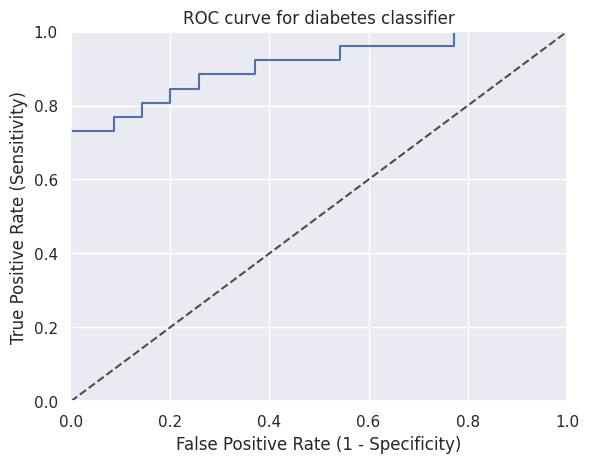

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
auc(fpr, tpr)

In [ ]:
! pip install eli5
! pip install shap
! pip install pdpbox


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=81ddf9c57b0e7d9b1ab413a7c012f8c68d745b5bbdbb86e88132a6e6a57bf7df
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 16.0 MB/s eta 0:00:00


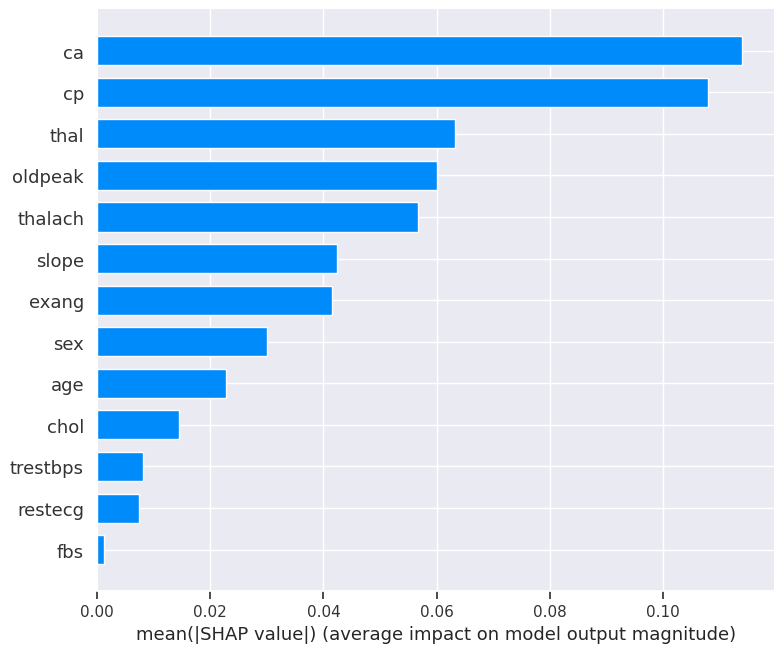

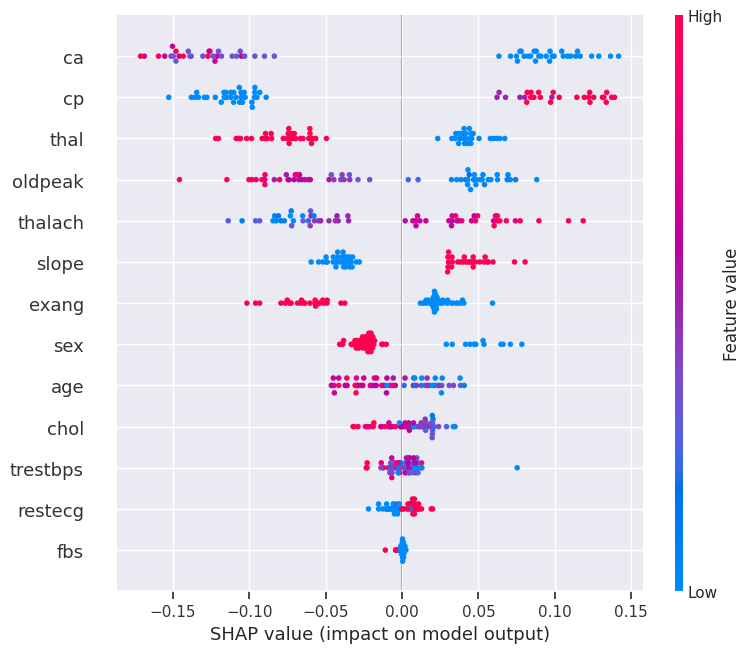

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp, info_plots

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

shap.summary_plot(shap_values[1], X_test)


In [ ]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)


In [ ]:
data_for_prediction = X_test.iloc[5,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)